Text(0, 0.5, 'Pass')

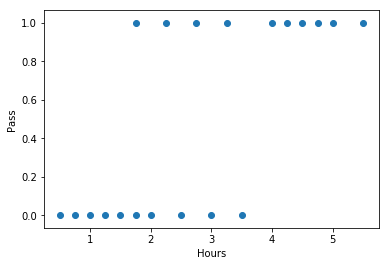

In [14]:
#Practice Exercises 

import pandas
import matplotlib.pyplot as plt
import numpy 
from sklearn.linear_model import LogisticRegression

student_df = pandas.read_csv("./hours_pass.csv")
plt.scatter(student_df["Hours"],student_df["Pass"])
plt.xlabel("Hours")
plt.ylabel("Pass")

Note: The depedent var "Pass" is binary wrt to the independent variable Hours which is continuous 

For futher exploration the data is divided into two segments, Say Hours > 3 and Hours < 3  is the baseline model. For the purpose of Exercise 1 directly using the complete dataset as the training set.  

In [48]:
log_reg = LogisticRegression(solver='lbfgs')
X_train = numpy.array(student_df["Hours"]).reshape(-1,1)
Y_train = numpy.array(student_df["Pass"])

X_test = numpy.array(pandas.DataFrame({"Hours":[6]})["Hours"]).reshape(1,-1)
Y_test = None

log_reg.fit(X_train,Y_train)

# print(log_reg.classes_)
y_pred1 = log_reg.predict_proba(X_test)[:,1]  # There are two classes, 0-1 we just take the one we intend to analyze 
y_pred1

array([0.97706971])

The probability that a student will pass given he studied for 6 hrs in 0.977 as calculated above 

In [49]:
# Exercise 2 

student_df["Fail"] = student_df.apply(lambda x: int(abs(x["Pass"]-1)),axis = 1)

X_train = numpy.array(student_df["Hours"]).reshape(-1,1)
Y_train = numpy.array(student_df["Fail"])   # Check the reverse 

X_test = numpy.array(pandas.DataFrame({"Hours":[6]})["Hours"]).reshape(1,-1)
Y_test = None

log_reg.fit(X_train,Y_train)

# print(log_reg.classes_)
y_pred2 = log_reg.predict_proba(X_test)[:,1]  # There are two classes, 0-1 we just take the one we intend to analyze
# Note that here 1 = Fail 
y_pred2

array([0.02293029])

In [50]:
# Checking the sum of probabilities in both cases >>  Result = TRUE
s = y_pred1 + y_pred2
s

array([1.])

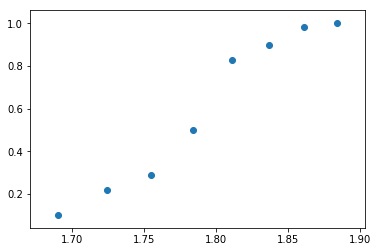

In [57]:
# Exercise 3 

dead_df = pandas.read_csv("./dead_beetles.csv")
dead_df["prob_of_death"] = dead_df.apply(lambda x: x["Dead beetles"]/x["Total number of beetles"], axis = 1)
plt.scatter(dead_df["Dose"],dead_df["prob_of_death"])


The distribution of probabilitiy of death wrt Dosage varies as shown above 

The tilted S_shaped curve is a good indicator that logistic regression can be used to estimate the probability of death against the dose of CS2 

Firstly we need to transform the dataset to make dependent variable as binary for fitting it to logistic regression

In [62]:
dead_df
observations = {"dose":[],"dead":[]}
for indx,row in dead_df.iterrows():
    deaths = [1]*int(row["Dead beetles"]) + [0]*(int(row["Total number of beetles"]) - int(row["Dead beetles"]))
    dose = [row["Dose"]]*int(row["Total number of beetles"])
    observations["dose"] += dose
    observations["dead"] += deaths

dead_df_binary = pandas.DataFrame(observations)
dead_df_binary[1:10]

,dose,dead
1,1.6907,1
2,1.6907,1
3,1.6907,1
4,1.6907,1
5,1.6907,1
6,1.6907,0
7,1.6907,0
8,1.6907,0
9,1.6907,0


In [63]:
# Part 1 : with Dose as Independent Variable
# Using the full dataset as the training data 
X_train = numpy.array(dead_df_binary["dose"]).reshape(-1,1)
Y_train = numpy.array(dead_df_binary["dead"])

log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
log_reg.score(X_train,Y_train)

0.7733887733887734

In [66]:
# Part 2 
# Using sq of dose as independent variable
dead_df_binary["sq_dose"] = dead_df_binary.apply(lambda x: x["dose"]**2,axis = 1)

X_train = numpy.array(dead_df_binary["sq_dose"]).reshape(-1,1)
Y_train = numpy.array(dead_df_binary["dead"])

log_reg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
log_reg.score(X_train,Y_train)

0.8274428274428275

The Accuracy of the logistic regression has improved by squaring the dose. 

In [90]:
# Exercise 4 

patient_df = pandas.read_csv("patients.csv")
patient_df = patient_df.rename(columns = {"Unnamed: 0":"category1",
                             "NewYork":"NewYork Sick",
                             "Unnamed: 2": "NewYork NotSick",
                             "Philadelphia":"Philadelphia Sick",
                             "Unnamed: 4":"Philadelphia NotSick"})[1:]

patient_df_dataset = {"site":[],"status":[],"sick":[]}

for indx,row in patient_df.iterrows():
    
    site = ["NewYork"]*(int(row["NewYork Sick"]) + int(row["NewYork NotSick"]))
    status = [row["category1"]]*(int(row["NewYork Sick"]) + int(row["NewYork NotSick"]))
    sick = [1]*int(row["NewYork Sick"]) + [0]*int(row["NewYork NotSick"])
    patient_df_dataset["site"] += site
    patient_df_dataset["status"] += status
    patient_df_dataset["sick"] += sick
    
    #print(len(site),len(status),len(sick))
    
    site = ["Philadelphia"]*(int(row["Philadelphia Sick"]) + int(row["Philadelphia NotSick"]))
    status = [row["category1"]]*(int(row["Philadelphia Sick"]) + int(row["Philadelphia NotSick"]))
    sick = [1]*int(row["Philadelphia Sick"]) + [0]*int(row["Philadelphia NotSick"])
    patient_df_dataset["site"] += site
    patient_df_dataset["status"] += status
    patient_df_dataset["sick"] += sick
    
patient_df_binary = pandas.DataFrame(patient_df_dataset)
patient_df_binary[:10]


100 100 100
500 500 500


,site,status,sick
0,NewYork,alcoholic,1
1,NewYork,alcoholic,1
2,NewYork,alcoholic,1
3,NewYork,alcoholic,1
4,NewYork,alcoholic,1
5,NewYork,alcoholic,1
6,NewYork,alcoholic,1
7,NewYork,alcoholic,1
8,NewYork,alcoholic,1
9,NewYork,alcoholic,1
